# Dogrusal Olmayan Regresyon

## 1-)KNN

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [5]:
knn_model.n_neighbors

5

* *knn_model.n_neighbors ozelligi degistikce degerler degisir. İleride bu ozelligi optimize edecegiz*

### KNN Tahmin

In [6]:
y_pred = knn_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))
 # test hatasi

426.6570764525201

In [8]:
RMSE = []
for k in range(1,10):
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k = ", k, "icin mse degeri:", rmse)

k =  1 icin mse degeri: 0.0
k =  2 icin mse degeri: 179.52761335480352
k =  3 icin mse degeri: 205.20157172291863
k =  4 icin mse degeri: 220.5139794876305
k =  5 icin mse degeri: 239.64671325413764
k =  6 icin mse degeri: 243.5904190007242
k =  7 icin mse degeri: 258.1478781634636
k =  8 icin mse degeri: 266.05374203349805
k =  9 icin mse degeri: 269.73782093553376


### KNN Model Tuning

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
knn_params = {'n_neighbors':np.arange(1,30,1)}
# denenecek olan parametreleri uretildi
# key degeri uygulamanin kabul ettigi algoritma adi olmali

* *GridSearch kendisine verilen degerleri kombinasyonlarini kontrol eder*

In [11]:
knn = KNeighborsRegressor()

In [12]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
# 1. prmtre model, 2. denenecek olan parametreler, 3. ise islemin kat sayisi

In [13]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
knn_cv_model.best_params_["n_neighbors"]
# en iyi k parametresi boylece bulunmus oldu

8

* *Test hatalari her zaman valide edilmis model uzerinden degerlendirilmelidir.*

In [15]:
knn_last = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"] )
# en uygun k parametresiyle olusturuldu

In [16]:
knn_last.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=8, p=2,
          weights='uniform')

In [17]:
np.sqrt(mean_squared_error(y_test, knn_last.predict(X_test)))

413.7094731463598

# 2-)SVR

In [18]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [19]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [20]:
from sklearn.svm import SVR

In [21]:
svr_model = SVR("linear").fit(X_train,y_train)
# "linear" keyword

In [22]:
svr_model.predict(X_train)[0:10]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756, 666.91219512, 150.08292683, 304.13780488,
       507.88780488, 815.99756098])

In [23]:
print(" y = {0} + {1}x ".format(svr_model.intercept_[0],
                               svr_model.coef_[0][0]))

 y = -48.69756097561513 + 4.969512195122093x 


In [24]:
X_train[0:1]

,Hits
183,91.0


In [25]:
-48.69756097561513 + 4.969512195122093 * 91

403.5280487804953

In [26]:
svr_model.predict(X_train)[0:1]

array([403.52804878])

In [27]:
y_pred = svr_model.predict(X_train)

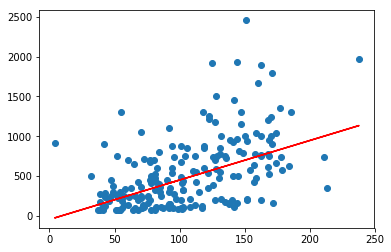

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = "r")

In [29]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [30]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

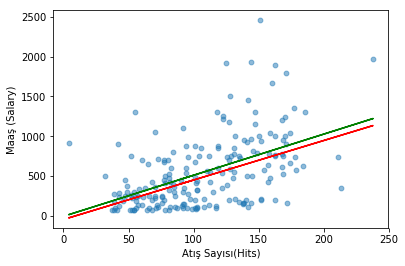

In [31]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

* *Basit SVR tahmini 403.5 , Linear tahmini ise 461.8 aradaki fark ayrık gozlemler sebebinden. SVR, Linear modele gore ayrik verilerden daha az etkilenir. Yuksek degerli aykiri gozlemler modeli yukariya ceker.*

### SVR Tahmin

In [32]:
y_pred = svr_model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))
# test hatasi

459.0187960365147

In [34]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### SVR Model Tuning

In [35]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

* *Yukaridaki C parametresi karmasiklik parametresidir bununla oynayip modeli gelistirecegiz*

In [36]:
svr_params = {"C": np.arange(0.1, 2, 0.1)}
# baslangic bitis ve arama raligi parametreleri verildi

In [37]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv =10).fit(X_train, y_train)
# svr_model, svr_params kullanilarak 10 katli bir gridsearch yapacak sonrasinde direkt fit edecek

In [38]:
svr_cv_model.best_params_

{'C': 0.1}

In [39]:
c = pd.Series(svr_cv_model.best_params_)[0]
# asagiya direkt parametre verebilmek icin bu duzene getirdik

In [40]:
svr_tuned = SVR("linear", C = c).fit(X_train, y_train)

In [41]:
y_pred = svr_tuned.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

* *İstersek svr_tuned olusturmak yerine svr_cv_modeli de kullanabilirdik cunku svr_cv_model calisinca en dogru parametre degerini kendi atar bizim svr_tuned'deki gibi parametre vermemize ihtiyac duymaz*

## 2a-) Dogrusal Olmayan SVR

In [43]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [44]:
svr_rbf = SVR("rbf").fit(X_train, y_train)
# dogrusal olmayan SVR modeli

### Tahmin

In [45]:
y_pred = svr_rbf.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

473.4445984431814

In [47]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

* *C parametresi optimize edilecek*

In [48]:
svr_params = { "C": [0.1, 0.4, 5, 10 ,20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
svr_cv_model.best_params_
 # optimum c bulundu

{'C': 20}

In [50]:
best_c = pd.Series(svr_cv_model.best_params_)[0]

In [51]:
svr_tuned = SVR("rbf", C = best_c).fit(X_train, y_train)

In [52]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

472.20974524750574

## 3-) Yapay Sinir Aglari

In [53]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [57]:
from sklearn.neural_network import MLPRegressor

In [58]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100, 20)).fit(X_train_scaled, y_train)

In [59]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
mlp_model.n_layers_
# genel framework

4

In [61]:
mlp_model.hidden_layer_sizes

(100, 20)

### Tahmin


In [62]:
mlp_model.predict(X_train_scaled)[0:5]

array([137.11112522, 396.7618237 , 257.27118625, 129.07154483,
       104.12010786])

In [63]:
y_pred = mlp_model.predict(X_test_scaled)

In [64]:
np.sqrt(mean_squared_error(y_test, y_pred))

442.5139800929316

### Model Tuning

In [65]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

* *Hidden_layer_size parametresi hangi katmanda kac notorn olacagini belirler.*
* *(100,20) dendiginde ilk katmanda 100 ikinci katmanda 20 noron belirler*

In [66]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             "activation": ["relu", "logistic"]}

In [67]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [68]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.01, 0.02, 0.005], 'hidden_layer_sizes': [(20, 20), (100, 50, 150), (300, 200, 150)], 'activation': ['relu', 'logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

In [73]:
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100, 50, 150), activation = "relu")
# yukarida buldugumuz iyi parametrelerle ayarlanmıis modeli kurduk

In [74]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [78]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.30531959579474